In [1]:
from pathlib import Path
from rates import Kadonis

In [2]:
kadonis1 = Kadonis(version=1)  # == Kadonis(Path.cwd().parent / "Data/kadonis_rrates_1.0.txt")

In [3]:
kadonis03 = Kadonis(version=0.3)  # == Kadonis(Path.cwd().parent / "Data/kadonis_rrates_0.3.txt")

In [4]:
kadonis1['ne20'] == kadonis03['ne20']

True

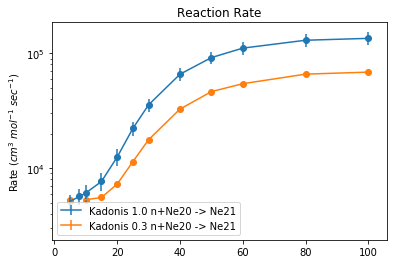

In [5]:
kadonis1['ne20'].mpl_plot(temp_unit="KeV")
kadonis03['ne20'].mpl_plot(temp_unit="KeV")

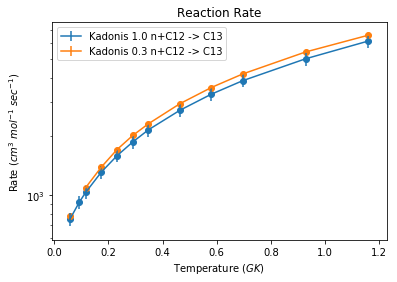

In [6]:
kadonis1['C12'].mpl_plot()
kadonis03['C12'].mpl_plot()